In [90]:
import numpy as np

from neuralregressionnetwork import NeuralRegressionNetwork
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark')

In [91]:
import pandas as pd

df_train = pd.read_table("sincTrain25.dt",header=None, delimiter=" ")
x_train = df_train[0].to_numpy()
y_train = df_train[1].to_numpy()

df_test = pd.read_table("sincValidate10.dt",header=None,delimiter=" ")
x_test = df_test[0].to_numpy()
y_test = df_test[1].to_numpy()

In [92]:
nn = NeuralRegressionNetwork(no_of_neurons=[10,5,10])
ls = nn.train(x_train,y_train,10000,0.1,x_val=x_test,y_val=y_test)

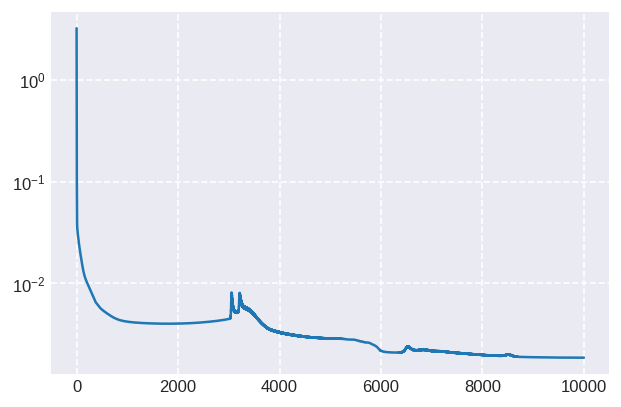

In [93]:
fig, ax = plt.subplots(dpi=120)
ax.set_yscale('log')
ax.grid(linestyle='--', linewidth=1)
ax.plot(range(len(ls)),np.array(ls))
# ax.plot(range(len(es)),np.array(es))

In [94]:
# fig, ax = plt.subplots(dpi=120)
# ax.set_yscale('log')
# ax.plot(range(len(gs)),gs)

<ipython-input-95-cff7d54a19b3>:5: RuntimeWarning: invalid value encountered in true_divide
  y_real = np.sin(x_lin)/x_lin


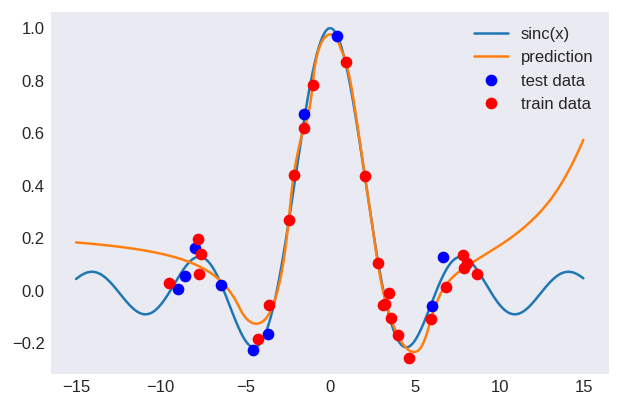

In [95]:
x_lin = range(-1500,1500,5)
x_lin = np.array(x_lin) / 100
y_pred = nn.predict(x_lin)
y_pred = np.reshape(y_pred, -1)
y_real = np.sin(x_lin)/x_lin

fig, ax = plt.subplots(dpi=120)
ax.plot(x_lin, y_real, label='sinc(x)')
ax.plot(x_lin, y_pred, label='prediction')
ax.plot(x_test, y_test, 'bo', label='test data')
ax.plot(x_train, y_train, 'ro', label='train data')
ax.plot()
ax.legend()

/home/wimmerth/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


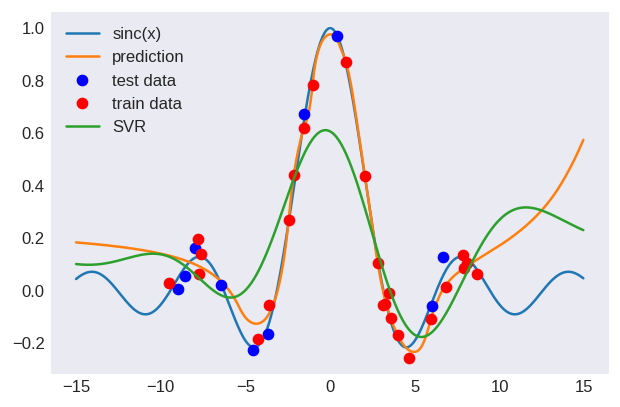

In [96]:
from sklearn.svm import SVR
svr = SVR()
x_train = x_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)
x_lin = x_lin.reshape(-1,1)
svr.fit(x_train,y_train)
ax.plot(x_lin,svr.predict(x_lin),label='SVR')
ax.legend()
fig

In [97]:
from tensorflow import keras
from tensorflow.keras.layers import Dense
tf_model = keras.Sequential()
tf_model.add(Dense(10,activation=keras.activations.sigmoid,input_dim=1))
tf_model.add(Dense(10,activation=keras.activations.sigmoid))
tf_model.add(Dense(10,activation=keras.activations.sigmoid))
tf_model.add(Dense(1))
tf_model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.1),loss=keras.losses.mean_squared_error)
tf_model.fit(x_train,y_train,epochs=10000,verbose=0)
tf_model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 70ms/step - loss: 0.0244


0.024374419823288918

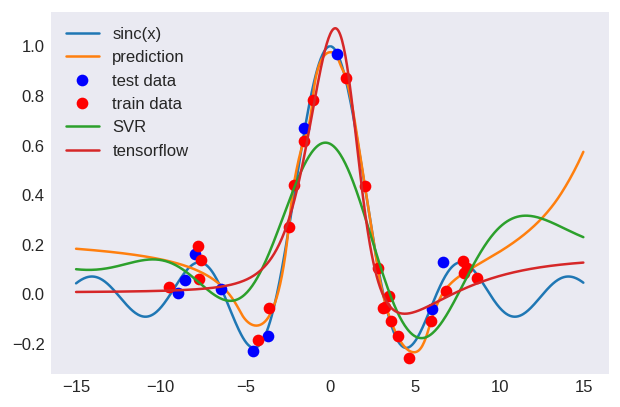

In [98]:
x_lin = range(-1500,1500,5)
x_lin = np.array(x_lin) / 100
ax.plot(x_lin,tf_model.predict(x_lin),label='tensorflow')
ax.legend()
fig